In [ ]:

library(readxl)
library(magrittr) 
library(dplyr)    
H1B <- read_excel("C:/Users/zhouco/Downloads/H1B.xlsx")
View(H1B)

jobs_include <- c('ANALYST', 'ANALYTICS', 'ANALYSIS', 'STATISTICS',
                  'DATA SCIENTIST', 'STATISTICIAN', 'BIOSTATISTICIAN', 'MODELER',
                  'MACHINE LEARNING', 'DATA SCIENCE', 'PREDICTIVE',
                  'BUSINESS INTELLIGENCE', 'REPORTING')
jobs_exclude <- c('SYSTEM ANALYST', 'SYSTEMS ANALYST', 'IT ANALYST', 'PROGRAMMER ANALYST', 
                  'APPLICATION ANALYST', 'COMPUTER ANALYST', 'SOFTWARE')

pattern_include <- paste0(jobs_include, collapse = '|')
pattern_exclude <- paste0(jobs_exclude, collapse = '|')
h1b <- function(STATE){
  STATE_stats <- H1B %>% 
    select(EMPLOYER_NAME, JOB_TITLE, EMPLOYER_CITY, EMPLOYER_STATE, WAGE_RATE_OF_PAY_FROM) %>%
    filter(EMPLOYER_STATE == STATE & grepl(pattern = pattern_include, JOB_TITLE) &
             !grepl(pattern = pattern_exclude, JOB_TITLE))
  
  STATE_stats_unique <- STATE_stats %>%
    group_by(EMPLOYER_NAME) %>%
    summarise(NUM_H1B_STATS = n()) %>%
    arrange(desc(NUM_H1B_STATS))
  
  STATE_stats_join <- STATE_stats %>%
    inner_join(STATE_stats_unique, by='EMPLOYER_NAME') %>%
    arrange(desc(NUM_H1B_STATS), desc(EMPLOYER_NAME))
  
  
  write.csv(STATE_stats_join, file=paste0(STATE, '_stats_h1b.csv'))
  write.csv(STATE_stats_unique, file=paste0(STATE, '_stats_company.csv'))
}
states = c('CA','OH')
sapply(states, FUN = h1b)


library(ggplot2)
california_company <- read.csv('CA_stats_company.csv')
california_h1b <- read.csv('CA_stats_h1b.csv')
head(california_company, 20)
set.seed(123)
california_h1b[floor(runif(7, min=0, max=nrow(ohio_h1b))), 2:7]
p <- ggplot(data = california_company, aes(x=NUM_H1B_STATS)) + 
  geom_histogram(binwidth = 1, fill='blue') +
  labs(title='Data Science H1B Visa Sponsors in California', 
       x='Number of H1B', y='Count of Employer') +
  theme_classic()
p



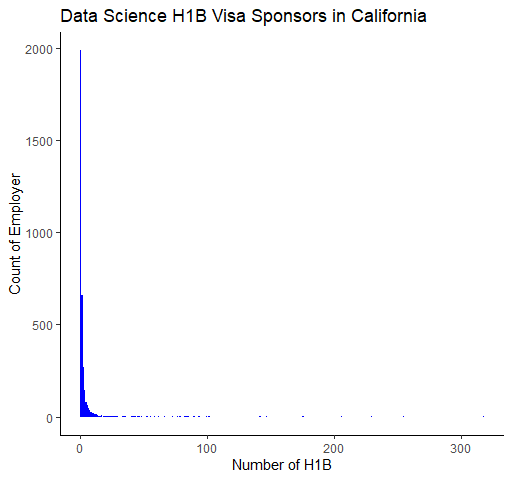